<Center><b><font size=6>LEAD SCORING CASE STUDY<font/><b/>

X-education company provide various kind of online courses through various platform of online marketinf but they still unable to convert all lead to there admission. There conversion ration is only 30%, so as a data analyst our job is to maximize these sale upto the mark or convert maximum lead into hot leads.

Goals of the Case Study
build a logical regression to maximize the lead conversion for company.
make a best model which  will help x-education for future goals.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

### Step 1: Reading and Understanding the data

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [3]:
# importing the dataset
leadscore= pd.read_csv("Leads.csv")
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking shape 
leadscore.shape

(9240, 37)

In [5]:
#  statistical aspects of the dataframe
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# let's see the types of each column
leadscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### step2: Data Cleaning, Manipulation 

In [7]:
# Checking the null values
leadscore.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

#### Inference:
From the above information We can observe that there are many columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [8]:
for x in leadscore.columns:
    if leadscore[x].isnull().sum()>3000:
        print(x , "has the null values: " , leadscore[x].isnull().sum())
        leadscore.drop(x , 1 , inplace=True)
        print("Dropped" , x)

Tags has the null values:  3353
Dropped Tags
Lead Quality has the null values:  4767
Dropped Lead Quality
Asymmetrique Activity Index has the null values:  4218
Dropped Asymmetrique Activity Index
Asymmetrique Profile Index has the null values:  4218
Dropped Asymmetrique Profile Index
Asymmetrique Activity Score has the null values:  4218
Dropped Asymmetrique Activity Score
Asymmetrique Profile Score has the null values:  4218
Dropped Asymmetrique Profile Score


In [9]:
# checking the null values
leadscore.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
A free copy of Mastering The Interview              0
Last Notable Activity                               0
Do Not Call                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Email                                        0
Lead Origin                 

In [10]:
# Checking the percentage of missing values:
missing_precent_values = round(100*(leadscore.isnull().sum()/len(leadscore)),2)
print(missing_precent_values.sort_values())

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Do Not Call                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Email                                      0.00
Lead Origi

In [11]:
# Getting the columns which are not very much important for our analysis
print(leadscore["Lead Number"].value_counts)
print('\n *************************************************** \n')
print(leadscore["Prospect ID"].value_counts)
print('\n *************************************************** \n')

<bound method IndexOpsMixin.value_counts of 0       660737
1       660728
2       660727
3       660719
4       660681
         ...  
9235    579564
9236    579546
9237    579545
9238    579538
9239    579533
Name: Lead Number, Length: 9240, dtype: int64>

 *************************************************** 

<bound method IndexOpsMixin.value_counts of 0       7927b2df-8bba-4d29-b9a2-b6e0beafe620
1       2a272436-5132-4136-86fa-dcc88c88f482
2       8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3       0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4       3256f628-e534-4826-9d63-4a8b88782852
                        ...                 
9235    19d6451e-fcd6-407c-b83b-48e1af805ea9
9236    82a7005b-7196-4d56-95ce-a79f937a158d
9237    aac550fe-a586-452d-8d3c-f1b62c94e02c
9238    5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9
9239    571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Name: Prospect ID, Length: 9240, dtype: object>

 *************************************************** 



Inference:
From the above we can find out that Lead number and Prospect ID have all unique values which are not very much useful for our data analysis,so we can drop them.

In [12]:
leadscore.drop(["Lead Number" , "Prospect ID"] , axis= 1 , inplace = True)
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [13]:
leadscore.shape

(9240, 29)

In [14]:
# Lets check null values again:
leadscore.isnull().sum().sort_values()

Lead Origin                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
A free copy of Mastering The Interview              0
Search                                              0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Last Notable Activity                               0
Lead Source                 

###  Handling the 'Select' Level that is present in many of the Categorical Variables:

#####  There are few columns where there is a level "Select" which means students had not selected any option for that particular column which is why it is showing "Select". These are null values, so we can impute NaN and drop them because these values are not useful for our analysis.  

In [15]:
# Converting 'Select' values to NaN.
leadscore = leadscore.replace('Select', np.nan)

In [16]:
# Checking the null values
leadscore.isnull().sum().sort_values(ascending = False)

How did you hear about X Education               7250
Lead Profile                                     6855
City                                             3669
Specialization                                   3380
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Lead Origin                                         0
Digital Advertisement                               0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations     

In [17]:
#Checking for NULL/MISSING values:  percentage of missing values in each column 
null_valuep_col = round(100*(leadscore.isnull().sum()/len(leadscore)), 2).sort_values(ascending=False)
null_valuep_col

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Re

In [18]:
null_col=leadscore.isnull().sum().sort_values(ascending=False)
null_col=null_col[null_col.values>(len(leadscore)*0)]

We see that for some columns we have **High Percentage of Missing Values**. We can drop the columns with missing values greater than 45% .

In [19]:
#Checking those column where Missing Values > 45% it will be wise to drop all those column so that they will not impact analysis.

null_valuep_col45= null_valuep_col[null_valuep_col.values > 45].sort_values(ascending=False)
print(f'''{"*"*80}\nTotal no of columns having null Values > 45 % need to be Dropped are:- {len(null_valuep_col45)}\n{"*"*80}''')
null_valuep_col45

********************************************************************************
Total no of columns having null Values > 45 % need to be Dropped are:- 2
********************************************************************************


How did you hear about X Education    78.46
Lead Profile                          74.19
dtype: float64

In [20]:
#Dropping all columns having Null values greater than 45 %
colms=leadscore.columns

for i in colms:
    if((100*(leadscore[i].isnull().sum()/len(leadscore.index))) >= 45):
        leadscore.drop(i, 1, inplace = True)

In [21]:
#checking null values percentage AFTER dropping columns with high percentage(>45%) missing values.

round(100*(leadscore.isnull().sum()/len(leadscore)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Search                                            0.00
Newspaper 

In [22]:
cont_cols=[]
cat_cols=[]
for i in leadscore.columns:
    if leadscore[i].nunique()>30:
        print(i,leadscore[i].nunique(),  "----cont_cols")
        cont_cols.append(i)
    else:
        print(i,leadscore[i].nunique(),  "----cat_cols")
        cat_cols.append(i)

Lead Origin 5 ----cat_cols
Lead Source 21 ----cat_cols
Do Not Email 2 ----cat_cols
Do Not Call 2 ----cat_cols
Converted 2 ----cat_cols
TotalVisits 41 ----cont_cols
Total Time Spent on Website 1731 ----cont_cols
Page Views Per Visit 114 ----cont_cols
Last Activity 17 ----cat_cols
Country 38 ----cont_cols
Specialization 18 ----cat_cols
What is your current occupation 6 ----cat_cols
What matters most to you in choosing a course 3 ----cat_cols
Search 2 ----cat_cols
Magazine 1 ----cat_cols
Newspaper Article 2 ----cat_cols
X Education Forums 2 ----cat_cols
Newspaper 2 ----cat_cols
Digital Advertisement 2 ----cat_cols
Through Recommendations 2 ----cat_cols
Receive More Updates About Our Courses 1 ----cat_cols
Update me on Supply Chain Content 1 ----cat_cols
Get updates on DM Content 1 ----cat_cols
City 6 ----cat_cols
I agree to pay the amount through cheque 1 ----cat_cols
A free copy of Mastering The Interview 2 ----cat_cols
Last Notable Activity 16 ----cat_cols


In [23]:
cont_cols=[ 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity',  
          'What is your current occupation', 'What matters most to you in choosing a course', 
          'Search','Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'Get updates on DM Content','Country','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview','Last Notable Activity','Specialization','City']

In [24]:
for i in cat_cols:
    print(i)
    print()
    print(leadscore[i].value_counts())
    print()
    print("percentage",100*leadscore[i].value_counts(normalize=True))
    print()

Lead Origin

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

percentage Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

Lead Source

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name

In [25]:
# Replacing the null values in categorical columns by mode of that respective the colmun
for i in cat_cols:
    if leadscore[i].isnull().sum()>0:
        value=leadscore[i].mode()[0]
        leadscore[i]=leadscore[i].fillna(value)

In [26]:
# Replacing the null values in continuous columns by median of that respective the colmun
for i in cont_cols:
    if leadscore[i].isnull().sum()>0:   
        value=leadscore[i].median()
        leadscore[i]=leadscore[i].fillna(value)

In [27]:
#now check all the null values are replaced or not
leadscore.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

- Also notice that when you got the value counts of all the columns,there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [28]:
leadscore = leadscore.drop(['Country','What matters most to you in choosing a course','Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content', 
                  'I agree to pay the amount through cheque'], axis=1)

In [29]:
leadscore.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [30]:
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Mumbai,No,Modified


#### converting some binary variables (Yes/No) to 0/1

In [31]:
print(leadscore["Do Not Email"].value_counts())
print(leadscore["A free copy of Mastering The Interview"].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


In [32]:
# Replacing the values of yes =1 and No= 0
leadscore["Do Not Email"].replace(to_replace = "No" , value = 0 , inplace = True)
leadscore["Do Not Email"].replace(to_replace = "Yes" , value = 1 , inplace = True)
leadscore["A free copy of Mastering The Interview"].replace(to_replace = "No" , value = 0 , inplace = True)
leadscore["A free copy of Mastering The Interview"].replace(to_replace = "Yes" , value = 1 , inplace = True)

In [33]:
# checking the value of the data
leadscore.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Mumbai,0,Modified


### step 3: Outlier Analysis

In [34]:
# Checking the data at 25%,50%,75%,90%,95% and above
leadscore.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.079437,0.385390,3.438636,487.698268,2.357440,0.312554
std,0.270435,0.486714,4.819024,548.021466,2.145781,0.463559
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,12.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,936.000000,3.000000,1.000000
90%,0.000000,1.000000,7.000000,1380.000000,5.000000,1.000000
95%,1.000000,1.000000,10.000000,1562.000000,6.000000,1.000000
99%,1.000000,1.000000,17.000000,1840.610000,9.000000,1.000000


-it can be clearly seen that outliers is there in the columns **TotalVisits** and **Page Views Per Visit columns**

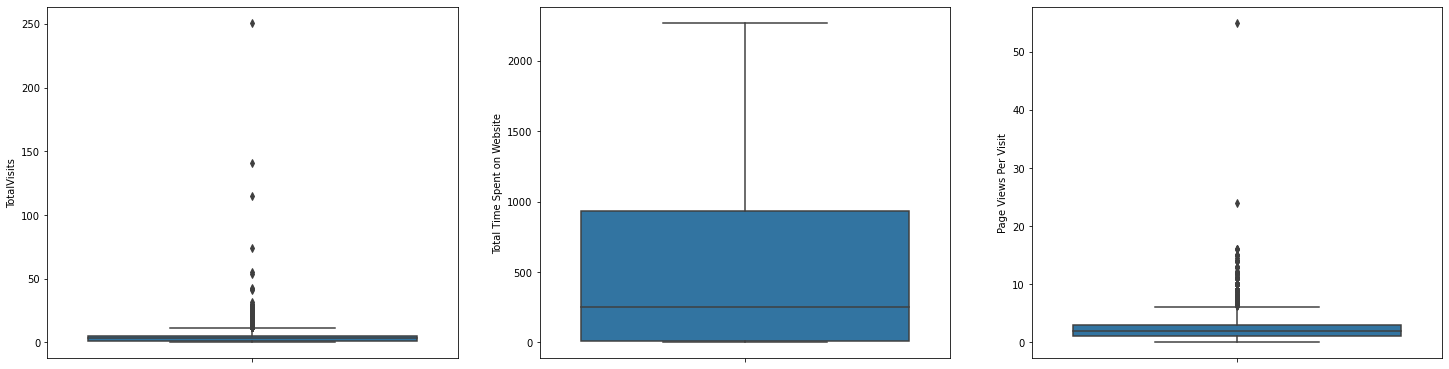

In [35]:
# Check the outliers for all the numeric columns

plt.figure(figsize=(25, 22))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = leadscore)
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leadscore)
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = leadscore)
plt.show()

In [36]:
# Removing values beyond 99% for Total Visits

total_visits = leadscore['TotalVisits'].quantile(0.99)
leadscore = leadscore[leadscore["TotalVisits"] < total_visits]
leadscore["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [37]:
# Removing values beyond 99% for page Views Per Visit

page_visits = leadscore['Page Views Per Visit'].quantile(0.99)
leadscore = leadscore[leadscore["Page Views Per Visit"] < page_visits]
leadscore["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [38]:
# Checking data again at 25%,50%,75%,90%,95% and above after removing values at 99 percentile
leadscore.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,0.077749,0.385092,3.087164,483.133016,2.226383,0.305682
std,0.267792,0.486644,2.801244,547.420675,1.823395,0.460721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,7.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,245.000000,2.000000,0.000000
75%,0.000000,1.000000,4.000000,929.000000,3.000000,1.000000
90%,0.000000,1.000000,7.000000,1378.000000,5.000000,1.000000
95%,1.000000,1.000000,8.000000,1558.000000,6.000000,1.000000
99%,1.000000,1.000000,13.000000,1839.720000,7.000000,1.000000


In [39]:
# Finding the percentage of data retained

percent_data = round(100*(len(leadscore)/9240),2)
print(percent_data)

97.72


- from the above information data has been cleaned and upto 98% of data has been retained..
- On this cleaned data we will do the data analysis

### Step 4: Visualising data

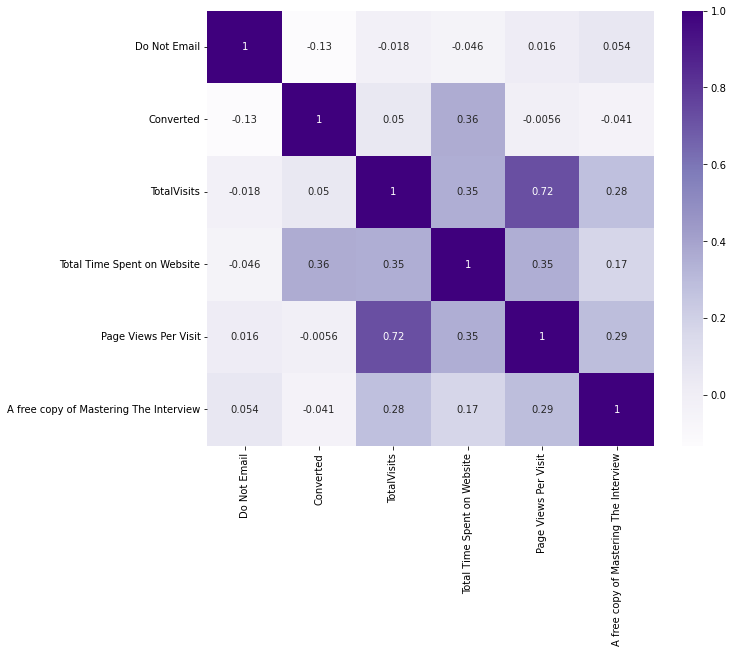

In [40]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(leadscore.corr(), cmap="Purples", annot=True)
plt.show()

In [41]:
cat_col1=['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation']

(0, 'Lead Origin')
(1, 'Lead Source')
(2, 'Last Activity')
(3, 'What is your current occupation')


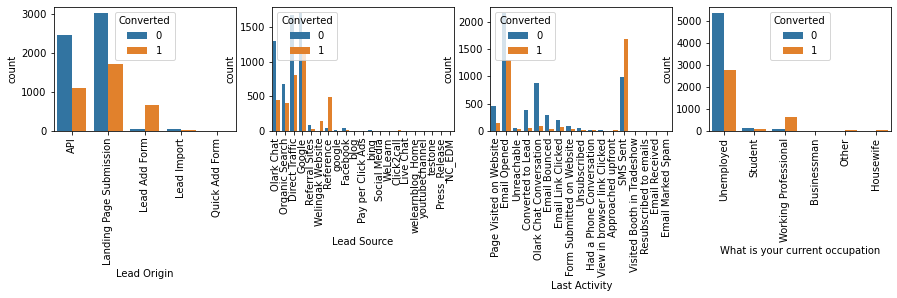

In [42]:
plt.figure(figsize = (15, 5))
for i in enumerate(cat_col1):
    plt.subplot(2,4,i[0]+1)
    print(i)
    sns.countplot(i[1], hue = 'Converted', data = leadscore)
    plt.xticks(rotation = 90)

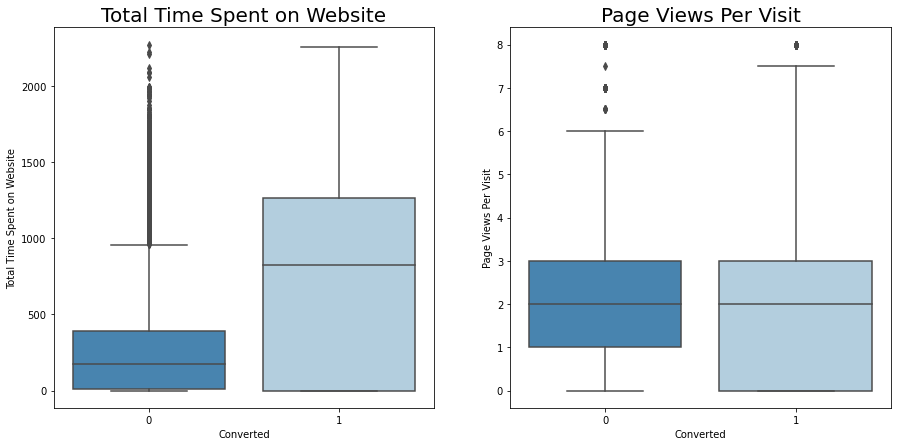

In [43]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(leadscore["Converted"] , leadscore["Total Time Spent on Website"] , palette = "Blues_r")
plt.title("Total Time Spent on Website", fontdict={'fontsize': 20, 'color' : 'black'})

plt.subplot(1,2,2)
sns.boxplot(leadscore["Converted"] , leadscore["Page Views Per Visit"] , palette = "Blues_r")
plt.title("Page Views Per Visit", fontdict={'fontsize': 20, 'color' : 'black'})

plt.show()

####  Univariate Analysis - Categorical Variables

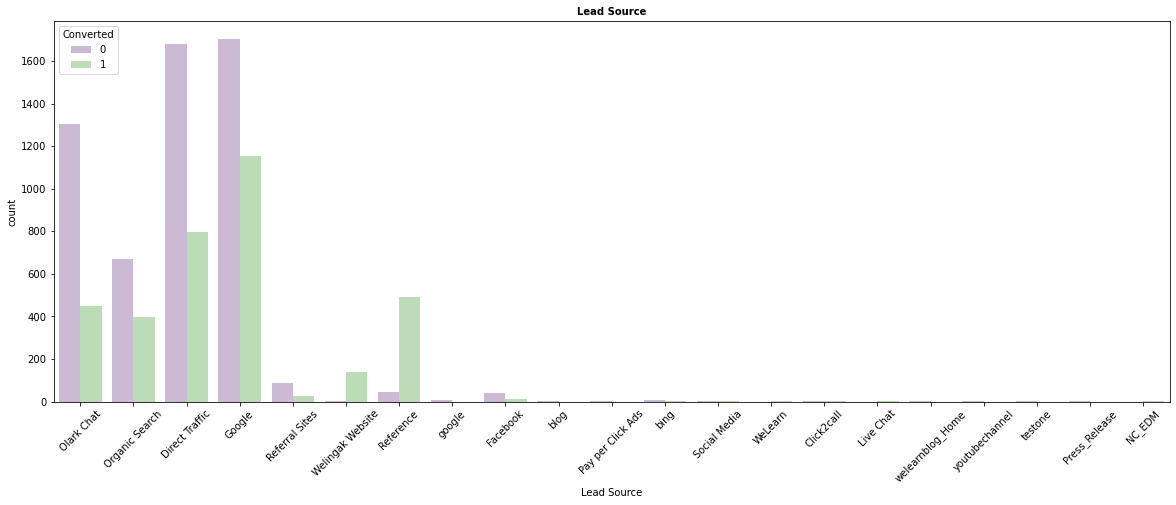

In [44]:
plt.figure(figsize = (20,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(leadscore['Lead Source'], hue = leadscore.Converted, palette = "PRGn")
plt.title('Lead Source', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

**Inference-
Google has the highest conversion rate.**

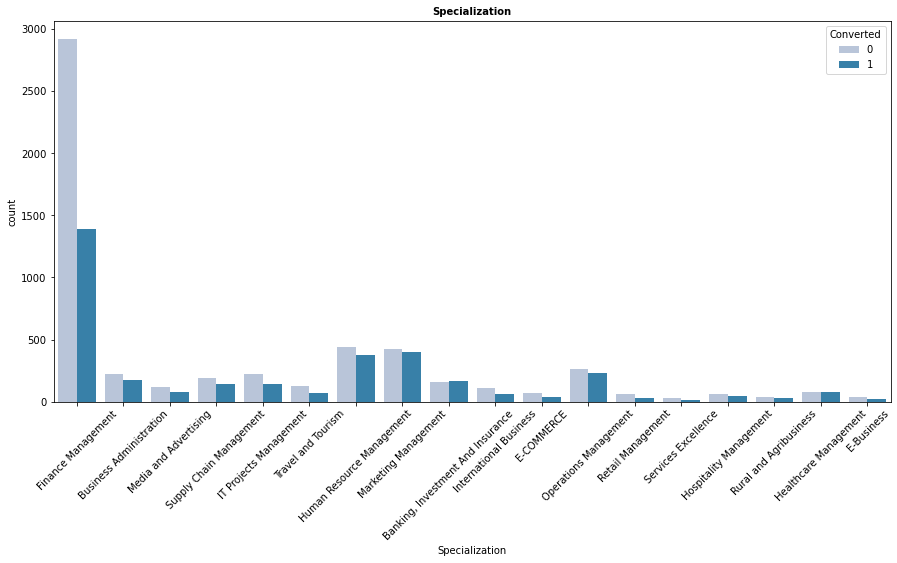

In [45]:
plt.figure(figsize = (15,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(leadscore['Specialization'], hue = leadscore.Converted, palette = "PuBu")
plt.title('Specialization', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)


plt.show()

**Inference-
Lead from Specialization who are unknown/Select columns has the highest rate of conversion.**

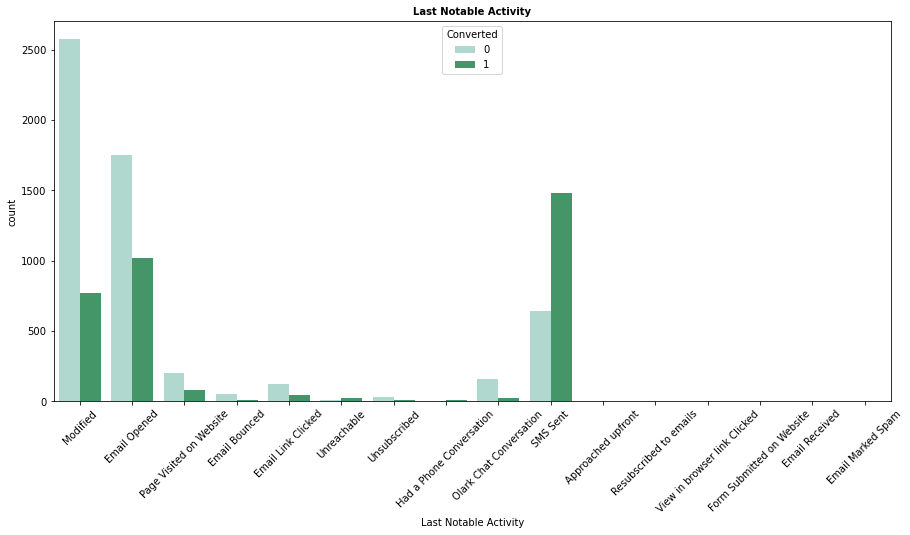

In [46]:
plt.figure(figsize = (15,7))
plt.subplots_adjust(hspace=0.2)

sns.countplot(leadscore['Last Notable Activity'], hue = leadscore.Converted, palette = "BuGn")
plt.title('Last Notable Activity', fontsize = 10, fontweight = 'bold')
plt.xticks(rotation = 45)

plt.show()

**Inference-
Students whose Last Notable Activity was found to be SMS Sent had the best conversion rate.**

#### Checking Data Imbalance

In [47]:
# Checking Imbalance of Data Converted_0 == 0(Lead not Converted) test_data1== 1 (Lead Converted)

Converted_0=leadscore[leadscore["Converted"]==0]
Converted_1=leadscore[leadscore["Converted"]==1]
print("Shape of All not Converted Leads -", Converted_0.shape)
print("Shape of All Converted Lead -", Converted_1.shape)

Shape of All not Converted Leads - (5552, 13)
Shape of All Converted Lead - (3477, 13)


In [48]:
#Calculating Data Imbalance
imbalance= round((Converted_0.shape[0])/(Converted_1.shape[0]),3)
print("Imbalance Ratio is =",imbalance)

Imbalance Ratio is = 1.597


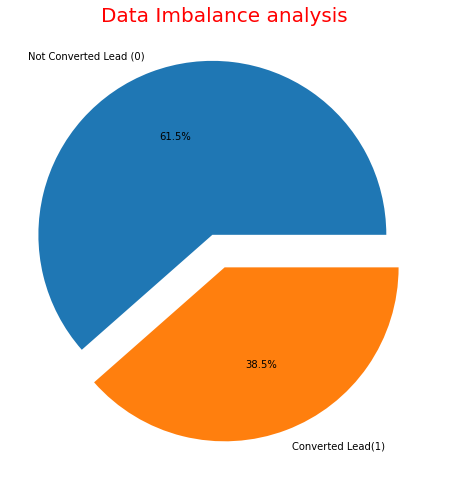

In [49]:
# Checking data distribution using Pie Chart
plt.figure(figsize=[8,8])
myexplode=[0.2,0]
plt.pie([Converted_0.shape[0],Converted_1.shape[0]], labels=["Not Converted Lead (0)","Converted Lead(1)"], explode=myexplode, autopct='%1.1f%%')
plt.title("Data Imbalance analysis\n", fontdict={'fontsize':20,'fontweight':6,'color':'red'})
plt.show()

### Step 5: Data Preparation for Modelling

- Dummy creation
- Splitting the Data into Training and Testing Sets
- Scaling The Features

In [50]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leadscore[['Lead Origin', 'What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leadscore = pd.concat([leadscore, dummy], axis=1)

In [51]:
leadscore=leadscore.drop(['Lead Origin','What is your current occupation','City','Specialization','Lead Source', 'Last Activity', 'Last Notable Activity'],1)

In [52]:
leadscore.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
leadscore.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Do Not Email,1.000000,-0.132879,-0.018485,-0.045955,0.016326,0.054237,0.092188,-0.019498,-0.017415,0.036248,-0.009668,-0.000930,0.008265,0.042258,-0.050739,0.006421,-0.006309,0.037217,-0.001966,0.045071,0.007149,0.009664,0.025535,-0.038046,0.010230,0.013708,-0.018257,0.070557,0.007692,-0.024313,0.002160,-0.011785,0.010968,0.022015,0.059067,0.001915,0.053250,0.104879,-0.017415,-0.059827,-0.004322,-0.003056,-0.049313,0.035700,-0.003056,0.036248,-0.037626,-0.010364,-0.004322,-0.003056,-0.000134,-0.007487,-0.003056,0.010746,-0.003056,-0.003056,0.036248,-0.062742,0.629983,-0.043026,0.051265,-0.221746,-0.004322,-0.021526,-0.009172,-0.053507,0.061357,-0.003056,-0.015231,0.008709,0.266423,-0.006113,-0.003056,0.279322,-0.037178,0.051265,-0.185983,-0.003056,-0.003056,-0.011025,0.118202,-0.012215,0.036091,-0.003056,-0.024659,-0.009972,0.246459,-0.003056
Converted,-0.132879,1.000000,0.050210,0.359630,-0.005636,-0.040934,-0.051533,0.325676,-0.023927,0.013299,0.042077,0.015090,-0.008123,-0.277132,0.312623,0.010224,0.024471,0.007899,0.042065,-0.007672,0.022386,-0.002347,-0.006741,-0.123479,0.029130,0.009233,0.049618,0.000610,-0.006012,0.067611,0.007062,0.043373,-0.007173,0.008961,-0.015136,0.015161,-0.010197,-0.07956

### Splitting the data into training and Splitting sets

In [54]:
# Putting feature variable to X
X = leadscore.drop(['Converted'], axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [55]:
y = leadscore['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [56]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
# Checking Shape of Train & Test
print("Train data shape :-",X_train.shape)
print("Test data shape :-",X_test.shape)

Train data shape :- (6320, 87)
Test data shape :- (2709, 87)


### Feature scaling using Minmax scaling

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
# Scaling the three numeric features present in the dataset
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5493,0,0.1250,0.042254,0.250,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8064,0,0.1875,0.041373,0.375,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4716,1,0.1875,0.099032,0.375,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9117,0,0.0000,0.000000,0.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2402,0,0.3750,0.381162,0.250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


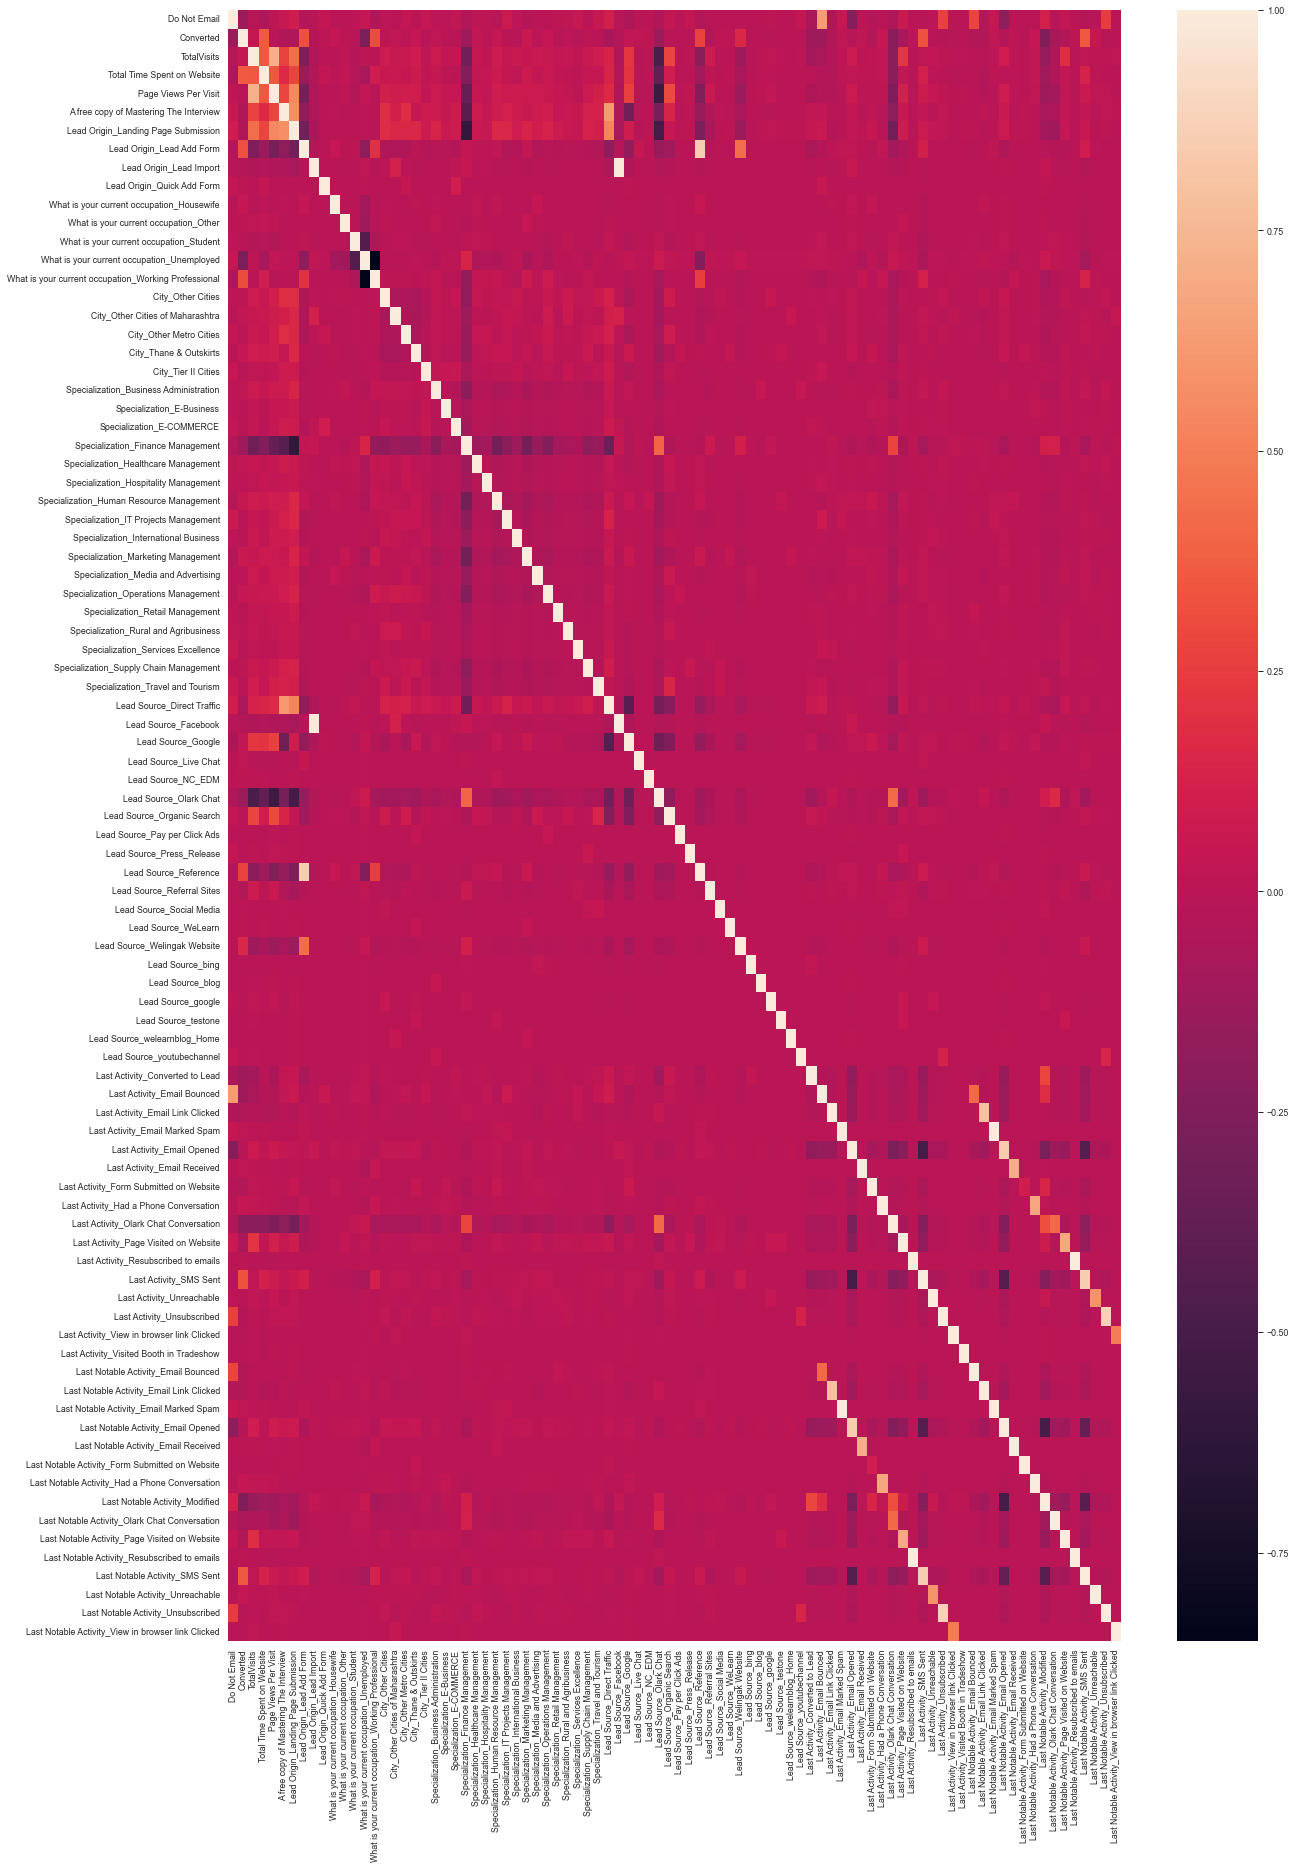

In [167]:
# Heatmap for correlation matrix
plt.figure(figsize=(20,30))
sns.heatmap(leadscore.corr())
plt.show()

### step 6: Model Building

- Now we will move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [61]:
import statsmodels.api as sm

In [62]:
# Logistic regression model with StatsModels
X_train=sm.add_constant(X_train)
lgm1=sm.GLM(y_train,X_train, family=sm.families.Binomial())
lgm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6240
Model Family:                Binomial   Df Model:                           79
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jun 2023   Deviance:                   1.5354e+05
Time:                        12:25:57   Pearson chi2:                 7.51e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 4.936e+15   5.26e+07   9.39e+07      0.000    4.94e+15    4.94e+15
Do Not Email                                         -6.196e+14   4.56e+06  -1.36e+08      0.000    -6.2e+14    -6.2e+14
TotalVisits                                          -1.113e+13   6.45e+06  -1.73e+06      0.000   -1.11e+13   -1.11e+13
Total Time Spent on Website                          -4.078e+13   3.81e+06  -1.07e+07      0.000   -4.08e+13   -4.08e+13
Page Views Per Visit                                  4.855e+14   5.96e+06   8.15e+07      0.000    4.85e+14    4.85e+14
A free copy of Mastering The Interview                2.874e+14    2.6e+06    1.1e+08      0.000    2.87e+14    2.87e+14
Lead Origin_Landing Page Submission                   -2.84e+14   2.63e+06  -1.08e+08      0.000   -2.84e+14   -2.84e+14
Lead Origin_Lead Add Form                             2.211e+14   1.32e+07   1.68e+07      0.000    2.21e+14    2.21e+14
Lead Origin_Lead Import                               6.623e+14   4.79e+07   1.38e+07      0.000    6.62e+14    6.62e+14
Lead Origin_Quick Add Form                            2.049e+05      0.002   8.85e+07      0.000    2.05e+05    2.05e+05
What is your current occupation_Housewife             5.469e+15   4.09e+07   1.34e+08      0.000    5.47e+15    5.47e+15
What is your current occupation_Other                 2.107e+15    3.7e+07    5.7e+07      0.000    2.11e+15    2.11e+15
What is your current occupation_Student               8.142e+14   3.07e+07   2.65e+07      0.000    8.14e+14    8.14e+14
What is your current occupation_Unemployed            6.814e+14   3.02e+07   2.25e+07      0.000    6.81e+14    6.81e+14
What is your current occupation_Working Professional  1.812e+15   3.04e+07   5.97e+07      0.000    1.81e+15    1.81e+15
City_Other Cities                                    -5.827e+13   3.28e+06  -1.78e+07      0.000   -5.83e+13   -5.83e+13
City_Other Cities of Maharashtra                     -1.486e+14   4.04e+06  -3.68e+07      0.000   -1.49e+14   -1.49e+14
City_Other Metro Cities                              -2.581e+14   4.44e+06  -5.81e+07      0.000   -2.58e+14   -2.58e+14
City_Thane & Outskirts                               -6.661e+13   3.32e+06  -2.01e+07      0.000   -6.66e+13   -6.66e+13
City_Tier II Cities                                  -9.458e+13   9.99e+06  -9.47e+06      0.000   -9.46e+13   -9.46e+13
Specialization_Business Administration               -1.541e+14    6.3e+06  -2.45e+07      0.000   -1.54e+14   -1.54e+14
Specialization_E-Business                            -3.073e+14   1.28e+07  -2.39e+07      0.000   -3.07e+14   -3.07e+14
Specialization_E-COMMERCE                             1.98

- Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

### Using RFE(Recursive Feature Selection)

In [63]:
#RFE - Selecting 15 Variables using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [64]:
# Top 15 Features Selected by RFE for Modelling are:
rfe.support_

array([False,  True,  True,  True, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False, False])

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 64),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 59),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Origin_Quick Add Form', False, 71),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 14),
 ('What is your current occupation_Student', False, 15),
 ('What is your current occupation_Unemployed', False, 12),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 52),
 ('City_Other Cities of Maharashtra', False, 50),
 ('City_Other Metro Cities', False, 69),
 ('City_Thane & Outskirts', False, 43),
 ('City_Tier II Cities', False, 34),
 ('Specialization_Business Administration', False, 47),
 ('Specialization_E-Business', False, 61),
 ('Specia

In [66]:
# list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [67]:
# list of rfe not supported columns
X_train.columns[~rfe.support_]

Index(['const', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_O

In [68]:
# Dataset of columns selected by RFE are:
X_train[col].head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Working Professional,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
5493,0,0.1250,0.042254,0,0,0,0,0,0,0,0,0,1,0,0
8064,0,0.1875,0.041373,0,0,0,0,0,0,0,0,0,1,0,0
4716,1,0.1875,0.099032,0,0,0,0,0,0,0,0,0,1,0,0
9117,0,0.0000,0.000000,0,0,0,1,0,0,0,1,0,0,0,0
2402,0,0.3750,0.381162,0,0,0,0,0,0,0,1,0,0,0,0


In [69]:
# BUILDING MODEL-1
# Fit a Logistic Regression Model on X-train after adding a constant and output the summary 

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = lm1.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.2
Date:                Mon, 05 Jun 2023   Deviance:                       5258.4
Time:                        12:26:09   Pearson chi2:                 7.02e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3920
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0725      0.103    -10.452      0.000      -1.274      -0.871
Do Not Email                                            -1.5796      0.171     -9.261      0.000      -1.914      -1.245
TotalVisits                                              1.1560      0.243      4.756      0.000       0.680       1.632
Total Time Spent on Website                              4.5601      0.167     27.233      0.000       4.232       4.888
Lead Origin_Lead Add Form                                4.0027      0.209     19.176      0.000       3.594       4.412
What is your current occupation_Housewife               23.2671    1.7e+04      0.001      0.999   -3.33e+04    3.33e+04
What is your current occupation_Working Professional     2.6154      0.181     14.430      0.000       2.260       2.971
Lead Source_Olark Chat                                   1.4800      0.119     12.431      0.000       1.247       1.713
Lead Source_Welingak Website                             2.2321      0.747      2.989      0.003       0.768       3.696
Last Activity_Olark Chat Conversation                   -1.1611      0.189     -6.132      0.000      -1.532      -0.790
Last Notable Activity_Email Link Clicked                -1.7838      0.253     -7.051      0.000      -2.280      -1.288
Last Notable Activity_Email Opened                      -1.4437      0.089    -16.296      0.000      -1.617      -1.270
Last Notable Activity_Had a Phone Conversation           1.8990      1.091      1.740      0.082      -0.239       4.038
Last Notable Activity_Modified                          -1.9372      0.097    -19.904      0.000      -2.128      -1.746
Last Notable Activity_Olark Chat Conversation           -1.7617      0.364     -4.840      0.000      -2.475      -1.048
Last Notable Activity_Page Visited on Website           -1.9601      0.213     -9.207      0.000      -2.377      -1.543
========================================================================================================================
"""

- there are variables which have high p -value (>0.5),Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an imperative parameter to test our linear model.

In [70]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.60
12,Last Notable Activity_Modified,2.01
8,Last Activity_Olark Chat Conversation,1.94
2,Total Time Spent on Website,1.93
6,Lead Source_Olark Chat,1.68
10,Last Notable Activity_Email Opened,1.68
3,Lead Origin_Lead Add Form,1.46
13,Last Notable Activity_Olark Chat Conversation,1.34
7,Lead Source_Welingak Website,1.29
5,What is your current occupation_Working Profes...,1.17


**We can drop "What is your current occupation_Housewife" beacuse p-value of this variable is high.**

In [71]:
# dropping column with high p-value
col = col.drop('What is your current occupation_Housewife',1)

In [72]:
# Building Model 2
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.1
Date:                Mon, 05 Jun 2023   Deviance:                       5270.1
Time:                        12:26:10   Pearson chi2:                 7.02e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0680      0.103    -10.417      0.000      -1.269      -0.867
Do Not Email                                            -1.5810      0.171     -9.272      0.000      -1.915      -1.247
TotalVisits                                              1.1436      0.243      4.708      0.000       0.668       1.620
Total Time Spent on Website                              4.5589      0.167     27.260      0.000       4.231       4.887
Lead Origin_Lead Add Form                                4.0015      0.209     19.189      0.000       3.593       4.410
What is your current occupation_Working Professional     2.6104      0.181     14.405      0.000       2.255       2.966
Lead Source_Olark Chat                                   1.4720      0.119     12.380      0.000       1.239       1.705
Lead Source_Welingak Website                             2.2248      0.747      2.979      0.003       0.761       3.689
Last Activity_Olark Chat Conversation                   -1.1621      0.189     -6.139      0.000      -1.533      -0.791
Last Notable Activity_Email Link Clicked                -1.7827      0.253     -7.047      0.000      -2.279      -1.287
Last Notable Activity_Email Opened                      -1.4358      0.088    -16.226      0.000      -1.609      -1.262
Last Notable Activity_Had a Phone Conversation           1.8989      1.091      1.740      0.082      -0.240       4.037
Last Notable Activity_Modified                          -1.9337      0.097    -19.883      0.000      -2.124      -1.743
Last Notable Activity_Olark Chat Conversation           -1.7576      0.364     -4.831      0.000      -2.471      -1.044
Last Notable Activity_Page Visited on Website           -1.9581      0.213     -9.200      0.000      -2.375      -1.541
========================================================================================================================
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.60
11,Last Notable Activity_Modified,2.01
7,Last Activity_Olark Chat Conversation,1.94
2,Total Time Spent on Website,1.93
5,Lead Source_Olark Chat,1.68
9,Last Notable Activity_Email Opened,1.68
3,Lead Origin_Lead Add Form,1.46
12,Last Notable Activity_Olark Chat Conversation,1.34
6,Lead Source_Welingak Website,1.29
4,What is your current occupation_Working Profes...,1.17


**we drop the variable with the higher P value : Last Notable Activity_Had a Phone Conversation**

In [74]:
# dropping column with high p-value
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

In [75]:
# BUILDING MODEL-3
X_train_sm = sm.add_constant(X_train[col])
lm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.3
Date:                Mon, 05 Jun 2023   Deviance:                       5274.6
Time:                        12:26:10   Pearson chi2:                 7.03e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3904
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0569      0.102    -10.330      0.000      -1.257      -0.856
Do Not Email                                            -1.5886      0.171     -9.315      0.000      -1.923      -1.254
TotalVisits                                              1.1581      0.242      4.779      0.000       0.683       1.633
Total Time Spent on Website                              4.5520      0.167     27.247      0.000       4.225       4.879
Lead Origin_Lead Add Form                                4.0004      0.209     19.181      0.000       3.592       4.409
What is your current occupation_Working Professional     2.6075      0.181     14.387      0.000       2.252       2.963
Lead Source_Olark Chat                                   1.4694      0.119     12.361      0.000       1.236       1.702
Lead Source_Welingak Website                             2.2252      0.747      2.979      0.003       0.761       3.689
Last Activity_Olark Chat Conversation                   -1.1606      0.189     -6.131      0.000      -1.532      -0.790
Last Notable Activity_Email Link Clicked                -1.7941      0.253     -7.094      0.000      -2.290      -1.298
Last Notable Activity_Email Opened                      -1.4478      0.088    -16.392      0.000      -1.621      -1.275
Last Notable Activity_Modified                          -1.9448      0.097    -20.022      0.000      -2.135      -1.754
Last Notable Activity_Olark Chat Conversation           -1.7691      0.364     -4.863      0.000      -2.482      -1.056
Last Notable Activity_Page Visited on Website           -1.9720      0.213     -9.271      0.000      -2.389      -1.555
========================================================================================================================
"""

In [76]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.59
10,Last Notable Activity_Modified,2.01
7,Last Activity_Olark Chat Conversation,1.94
2,Total Time Spent on Website,1.92
5,Lead Source_Olark Chat,1.68
9,Last Notable Activity_Email Opened,1.68
3,Lead Origin_Lead Add Form,1.46
11,Last Notable Activity_Olark Chat Conversation,1.34
6,Lead Source_Welingak Website,1.29
4,What is your current occupation_Working Profes...,1.17


In [77]:
# dropping column with high p-value
col = col.drop('Lead Source_Welingak Website',1)

In [78]:
# Building Model-4
X_train_sm = sm.add_constant(X_train[col])
lm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.1
Date:                Mon, 05 Jun 2023   Deviance:                       5290.3
Time:                        12:26:10   Pearson chi2:                 7.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3889
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0530      0.102    -10.291      0.000      -1.254      -0.852
Do Not Email                                            -1.5866      0.170     -9.332      0.000      -1.920      -1.253
TotalVisits                                              1.1504      0.242      4.749      0.000       0.676       1.625
Total Time Spent on Website                              4.5463      0.167     27.211      0.000       4.219       4.874
Lead Origin_Lead Add Form                                4.3547      0.200     21.749      0.000       3.962       4.747
What is your current occupation_Working Professional     2.5923      0.182     14.268      0.000       2.236       2.948
Lead Source_Olark Chat                                   1.4646      0.119     12.325      0.000       1.232       1.697
Last Activity_Olark Chat Conversation                   -1.1580      0.189     -6.120      0.000      -1.529      -0.787
Last Notable Activity_Email Link Clicked                -1.8024      0.254     -7.105      0.000      -2.300      -1.305
Last Notable Activity_Email Opened                      -1.4459      0.088    -16.384      0.000      -1.619      -1.273
Last Notable Activity_Modified                          -1.9457      0.097    -20.048      0.000      -2.136      -1.755
Last Notable Activity_Olark Chat Conversation           -1.7441      0.360     -4.839      0.000      -2.450      -1.038
Last Notable Activity_Page Visited on Website           -1.9723      0.213     -9.269      0.000      -2.389      -1.555
========================================================================================================================
"""

In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.59
9,Last Notable Activity_Modified,2.01
6,Last Activity_Olark Chat Conversation,1.94
2,Total Time Spent on Website,1.92
5,Lead Source_Olark Chat,1.68
8,Last Notable Activity_Email Opened,1.68
10,Last Notable Activity_Olark Chat Conversation,1.34
3,Lead Origin_Lead Add Form,1.15
4,What is your current occupation_Working Profes...,1.15
11,Last Notable Activity_Page Visited on Website,1.15


In [80]:
# dropping column with high p-value
#col = col.drop('Last Activity_Olark Chat Conversation',1)

In [81]:
# BUILDING MODEL- 5
#X_train_sm = sm.add_constant(X_train[col])
#lm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
#res = lm5.fit()
#print(res.summary())

In [82]:
#vif = pd.DataFrame()
#vif['Features'] = X_train[col].columns
#vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
#vif = vif.sort_values(by = "VIF", ascending = False)
#vif

**Now we have our final model.
The p values represents significance of the variables and VIF represent correlation of variable with each other.
The VIFs and p-values both are within an acceptable range. So we will move further and make our predictions using this model only.**

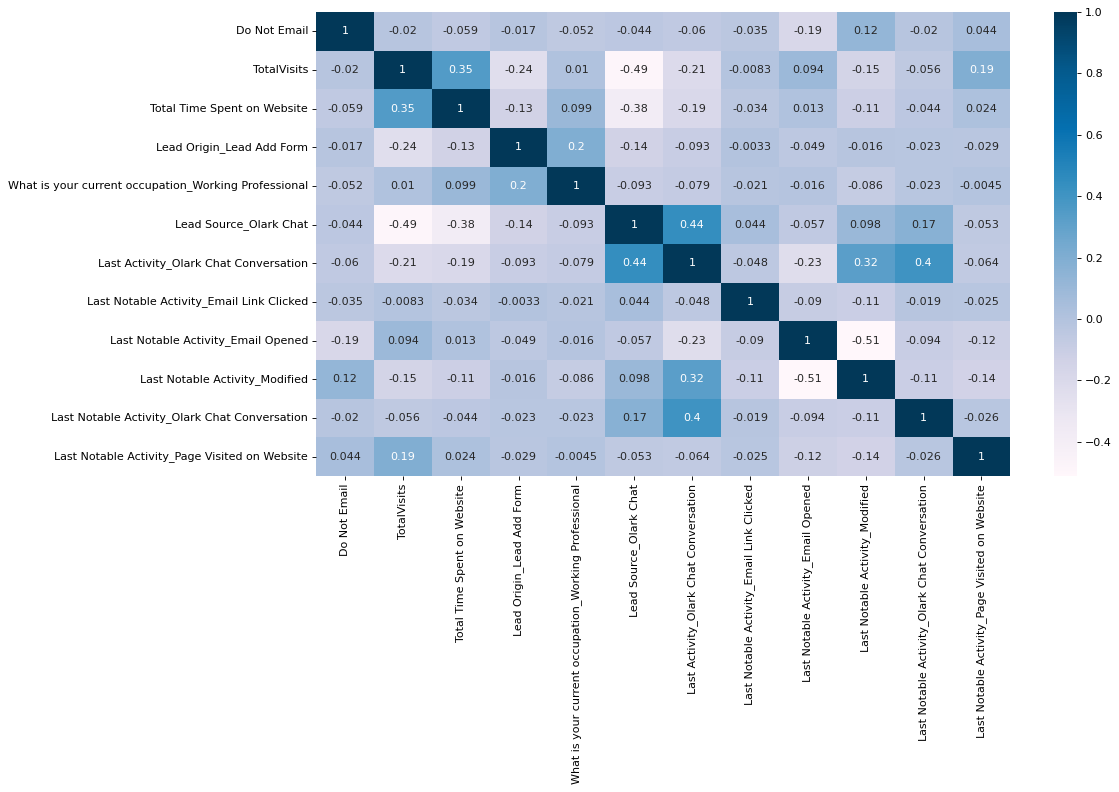

In [83]:
# Checking & Verifying & Validating Correlations Again:
plt.figure(figsize=(15,10), dpi=80, facecolor='w', edgecolor='k', frameon='True')

corr = X_train[col].corr()
sns.heatmap(corr, annot=True, cmap="PuBu")

plt.tight_layout()
plt.show()

### Step 7: Model Prediction

In [84]:
# Predicting the probabilities (of the "converted" value being 1) on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.06520241, 0.06946513, 0.01946568, 0.26224772, 0.41712438,
       0.0634377 , 0.0634377 , 0.12751397, 0.27733557, 0.33601558])

In [85]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect Id'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id
0,0,0.065202,5493
1,0,0.069465,8064
2,0,0.019466,4716
3,0,0.262248,9117
4,1,0.417124,2402


Now we will devise a dataframe having a new column 'predicted' with 1 if Converted_Prob > 0.5 else 0. Since the logistic curve gives you just the probabilities and not the actual classification of 'Converted' and 'Not Converted', you need to find a threshold probability to classify customers as 'Converted' and 'Not Converted'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer churning is less than 0.5, you'd classify it as 'Not Converted' and if it's greater than 0.5, you'd classify it as 'Converted'. The choice of 0.5 is completely arbitrary.

In [86]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id,predicted
0,0,0.065202,5493,0
1,0,0.069465,8064,0
2,0,0.019466,4716,0
3,0,0.262248,9117,0
4,1,0.417124,2402,0


### step 8: Model Evaluation

In [87]:
# Checking the confusion metrics
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3460  449]
 [ 752 1659]]


In [88]:
# checking the overall accuracy
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8099683544303797


In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6880962256325176

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.8851368636479918

In [92]:
# Calculate false postive rate - predicting non conversion when leads have converted
print(FP/ float(TN+FP))

0.11486313635200819


In [93]:
# positive predictive value 
print (TP / float(TP+FP))

0.7870018975332068


In [94]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8214624881291548


**Our model seems to have high accuracy (80.99%), low sensitivity (68.80%) and high specificity (88.51%).
We will indentify the customers which might convert, with the help of ROC Curves in the next section.**

### Step 9: Plotting ROC Curve

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
# TPR = True Positive Rate --> Out of actually 'converted' cases, how many is the model correctly predicting as 'converted'
# FPR = False Positive Rate --> Out of actual 'non-convert' cases, how many is the model incorrectly predicting as 'converted'

# Thus we would want as high TPR as possible & as low FPR as possible. Ideal model would have TPR = 1 and FPR = 0.
# ROC Curve shows the trade-off between TPR and FPR.

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

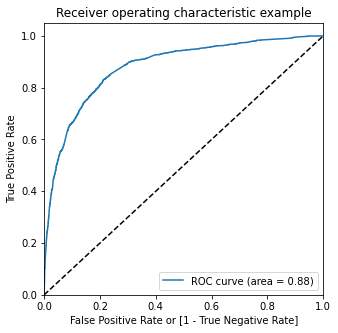

In [98]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve of the ROC is nearly equal to 1 which is quite good. so we seem to have a good model. Lets also check the sensitivity and specificity tradeoff to find the optimal cut off point.

### Step 10: Finding Optimal Cutoff Point

In [99]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.065202,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.069465,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.019466,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.262248,9117,0,1,1,1,0,0,0,0,0,0,0
4,1,0.417124,2402,0,1,1,1,1,1,0,0,0,0,0


In [100]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_p = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_p.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_p)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.601108  0.962671  0.378102
0.2   0.2  0.758386  0.907092  0.666667
0.3   0.3  0.800316  0.840315  0.775646
0.4   0.4  0.809335  0.772294  0.832182
0.5   0.5  0.809968  0.688096  0.885137
0.6   0.6  0.807753  0.628785  0.918138
0.7   0.7  0.783228  0.507673  0.953185
0.8   0.8  0.757120  0.411033  0.970581
0.9   0.9  0.709177  0.257155  0.987976


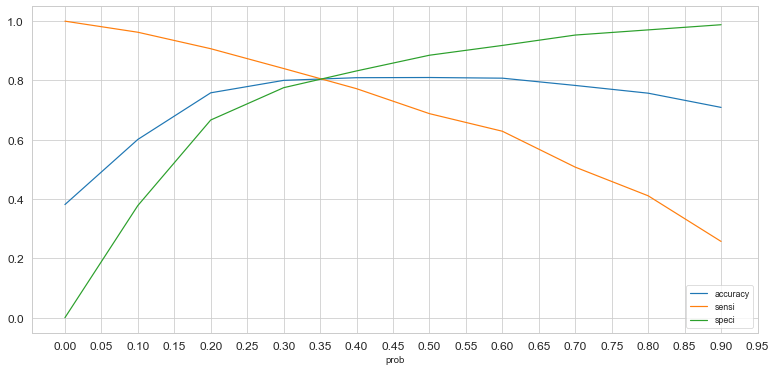

In [101]:
#Plotting Graph
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_p.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(13,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [102]:
# Evaluating the model with optimal probability cutoff as 0.34
y_train_pred_final['final_Predicted']=y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.34 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.065202,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.069465,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.019466,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.262248,9117,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.417124,2402,0,1,1,1,1,1,0,0,0,0,0,1


In [103]:
# Now let us calculate the lead score

y_train_pred_final['lead_score_board'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_Prob','Prospect Id','final_Predicted','lead_score_board']].head(10)

,Converted,Converted_Prob,Prospect Id,final_Predicted,lead_score_board
0,0,0.065202,5493,0,7
1,0,0.069465,8064,0,7
2,0,0.019466,4716,0,2
3,0,0.262248,9117,0,26
4,1,0.417124,2402,1,42
5,0,0.063438,1796,0,6
6,0,0.063438,1120,0,6
7,0,0.127514,253,0,13
8,0,0.277336,1491,0,28
9,1,0.336016,2004,0,34


In [104]:
#Lets check  accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted))

0.8033227848101265


In [105]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3108,  801],
       [ 442, 1969]], dtype=int64)

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Sensitivity 
TP / float(TP+FN)

0.8166735794276234

In [108]:
# specificity
TN / float(TN+FP)

0.795088257866462

In [109]:
# false postive rate
print(FP/ float(TN+FP))

0.204911742133538


In [110]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7108303249097473


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8754929577464788


- **Accuracy : 80.33%**
- **Sensitivity : 81.66%**
- **Specificity : 79.50%**

In [112]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[3108,  801],
       [ 442, 1969]], dtype=int64)

In [113]:
# Precision:
pre= TP/ (TP + FP)
pre

0.7108303249097473

In [114]:
# Recall:
rec=TP/ (TP + FN)
rec

0.8166735794276234

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final["Converted"],y_train_pred_final["final_Predicted"]))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83      3909
           1       0.71      0.82      0.76      2411

    accuracy                           0.80      6320
   macro avg       0.79      0.81      0.80      6320
weighted avg       0.81      0.80      0.81      6320



In [116]:
F1 = 2*(pre*rec)/(pre+rec)
F1

0.7600849256900213

In [117]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

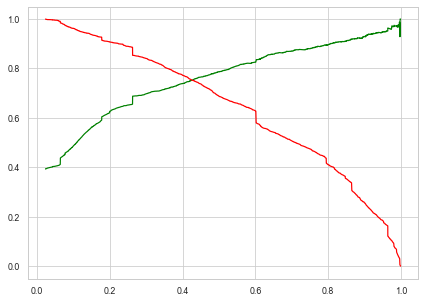

In [118]:
plt.figure(figsize=[7,5])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on test set

In [119]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [120]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
4664,0,0.0000,0.000000,0,0,1,0,0,1,0,0,0
5394,0,0.2500,0.072183,0,0,1,0,0,0,1,0,0
1595,0,0.2500,0.515405,0,1,0,0,0,0,1,0,0
2111,0,0.4375,0.229754,0,0,0,0,0,1,0,0,0
9182,0,0.0000,0.000000,0,0,1,0,0,0,1,0,0


In [121]:
print(y_test.shape)
print(X_test.shape)

(2709,)
(2709, 12)


In [122]:
#Add constant to X_test
X_test_sm = sm.add_constant(X_test)

In [123]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4664    0.262248
5394    0.285282
1595    0.902417
2111    0.278676
9182    0.177383
1055    0.374284
541     0.127508
446     0.981078
3728    0.058476
4249    0.017360
dtype: float64

In [124]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4664,0.262248
5394,0.285282
1595,0.902417
2111,0.278676
9182,0.177383


In [125]:
# Converting y_test to dataframe
y_test_dataframe = pd.DataFrame(y_test)

In [126]:
y_test_dataframe['Prospect Id'] = y_test_dataframe.index

In [127]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_dataframe.reset_index(drop=True, inplace=True)

In [128]:
# Appending y_test_dataframe and y_test_pred
y_pred_final = pd.concat([y_test_dataframe, y_test_pred],axis=1)

In [129]:
# Checking the head() of the final dataframe
y_pred_final.head()

,Converted,Prospect Id,0
0,0,4664,0.262248
1,0,5394,0.285282
2,1,1595,0.902417
3,0,2111,0.278676
4,0,9182,0.177383


In [130]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [131]:
y_pred_final['Lead_Score_Board'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect Id,Converted_Prob,Lead_Score_Board
0,0,4664,0.262248,26
1,0,5394,0.285282,29
2,1,1595,0.902417,90
3,0,2111,0.278676,28
4,0,9182,0.177383,18


In [132]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect Id','Converted','Converted_Prob', 'Lead_Score_Board'], axis=1)

In [133]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect Id,Converted,Converted_Prob,Lead_Score_Board
0,4664,0,0.262248,26
1,5394,0,0.285282,29
2,1595,1,0.902417,90
3,2111,0,0.278676,28
4,9182,0,0.177383,18


In [134]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect Id,Converted,Converted_Prob,Lead_Score_Board,final_predicted
0,4664,0,0.262248,26,0
1,5394,0,0.285282,29,0
2,1595,1,0.902417,90,1
3,2111,0,0.278676,28,0
4,9182,0,0.177383,18,0


In [135]:
## Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8036175710594315

In [136]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1306,  337],
       [ 195,  871]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8170731707317073

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.7948874010955569

- **Accuracy: 80.36%**
- **Sensitivity: 81.70%**
- **Specificity: 79.48%**

In [140]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7210264900662252

In [141]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8170731707317073

In [142]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20511259890444308


In [143]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7210264900662252


In [144]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8700866089273818


In [145]:
print(classification_report(y_pred_final["Converted"],y_pred_final["final_predicted"]))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1643
           1       0.72      0.82      0.77      1066

    accuracy                           0.80      2709
   macro avg       0.80      0.81      0.80      2709
weighted avg       0.81      0.80      0.81      2709



In [146]:
# Precision and Recall metrics for the test set

# precision
print('Precision - ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('Recall -',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision -  0.7210264900662252
Recall - 0.8170731707317073


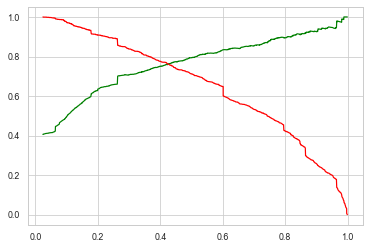

In [147]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs

In [148]:
from sklearn.model_selection import cross_val_score

X=X_train[:200]
y=y_train[:200]

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.65 0.75 0.75 0.75 0.75 0.8  0.8  0.85 0.85 0.9 ]
0.7849999999999999


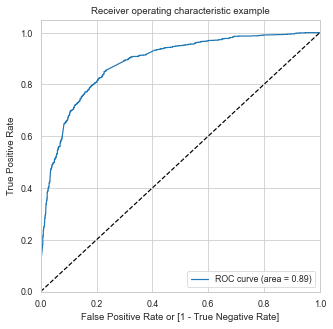

In [149]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )
draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

### Calculating the LEAD SCORE

In [150]:
#This needs to be calculated for all the leads from the original dataset (train + test)
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Prospect Id,Converted,Converted_Prob,Lead_Score_Board,final_predicted
0,4664,0,0.262248,26,0
1,5394,0,0.285282,29,0
2,1595,1,0.902417,90,1
3,2111,0,0.278676,28,0
4,9182,0,0.177383,18,0


In [151]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_Prob,Prospect Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,lead_score_board
0,0,0.065202,5493,0,1,0,0,0,0,0,0,0,0,0,0,7
1,0,0.069465,8064,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.019466,4716,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0.262248,9117,0,1,1,1,0,0,0,0,0,0,0,0,26
4,1,0.417124,2402,0,1,1,1,1,1,0,0,0,0,0,1,42


In [152]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Prospect Id','Converted','Converted_Prob','final_Predicted']]
leads_train_pred.head()

,Prospect Id,Converted,Converted_Prob,final_Predicted
0,5493,0,0.065202,0
1,8064,0,0.069465,0
2,4716,0,0.019466,0
3,9117,0,0.262248,0
4,2402,1,0.417124,1


In [153]:
leads_test_pred = leads_test_pred[['Prospect Id','Converted','Converted_Prob','final_predicted']]
leads_test_pred.head()

,Prospect Id,Converted,Converted_Prob,final_predicted
0,4664,0,0.262248,0
1,5394,0,0.285282,0
2,1595,1,0.902417,1
3,2111,0,0.278676,0
4,9182,0,0.177383,0


In [154]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Prospect Id,Converted,Converted_Prob,final_Predicted,final_predicted
0,5493,0,0.065202,0.0,NaN
1,8064,0,0.069465,0.0,NaN
2,4716,0,0.019466,0.0,NaN
3,9117,0,0.262248,0.0,NaN
4,2402,1,0.417124,1.0,NaN


In [155]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Prospect Id,Converted,Converted_Prob,final_Predicted,final_predicted,Lead_Score
0,5493,0,0.065202,0.0,NaN,7
1,8064,0,0.069465,0.0,NaN,7
2,4716,0,0.019466,0.0,NaN,2
3,9117,0,0.262248,0.0,NaN,26
4,2402,1,0.417124,1.0,NaN,42


In [156]:
# Inspecting the dataframe shape
lead_full_pred.shape

(9029, 6)

In [157]:
# Making the Prospect ID column as index

lead_full_pred = lead_full_pred.set_index('Prospect Id').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_Prob,final_Predicted,final_predicted,Lead_Score
Prospect Id,,,,,
0,0,0.177383,NaN,0.0,18
1,0,0.312022,0.0,NaN,31
2,1,0.670507,1.0,NaN,67
3,0,0.089764,NaN,0.0,9
4,1,0.500628,1.0,NaN,50


### Determining HOT LEADS with 89% accuracy more than 80% Conversion Rate

In [158]:
# Determining hot leads with more than 80% Conversion Rate
hot_leads = lead_full_pred[lead_full_pred["Lead_Score"]>80]
hot_leads.head()

,Converted,Converted_Prob,final_Predicted,final_predicted,Lead_Score
Prospect Id,,,,,
37,1,0.829137,1.0,NaN,83
64,1,0.962763,NaN,1.0,96
76,1,0.847543,NaN,1.0,85
77,1,0.977352,NaN,1.0,98
79,1,0.996222,NaN,1.0,100


In [159]:
# Hot Leads Shape
hot_leads.shape

(1589, 5)

### Determining Feature Importance

In [160]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.59
TotalVisits                                             1.15
Total Time Spent on Website                             4.55
Lead Origin_Lead Add Form                               4.35
What is your current occupation_Working Professional    2.59
Lead Source_Olark Chat                                  1.46
Last Activity_Olark Chat Conversation                  -1.16
Last Notable Activity_Email Link Clicked               -1.80
Last Notable Activity_Email Opened                     -1.45
Last Notable Activity_Modified                         -1.95
Last Notable Activity_Olark Chat Conversation          -1.74
Last Notable Activity_Page Visited on Website          -1.97
dtype: float64

In [161]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance.sort_values(ascending = False)

Total Time Spent on Website                            100.00
Lead Origin_Lead Add Form                               95.79
What is your current occupation_Working Professional    57.02
Lead Source_Olark Chat                                  32.21
TotalVisits                                             25.30
Last Activity_Olark Chat Conversation                  -25.47
Last Notable Activity_Email Opened                     -31.80
Do Not Email                                           -34.90
Last Notable Activity_Olark Chat Conversation          -38.36
Last Notable Activity_Email Link Clicked               -39.64
Last Notable Activity_Modified                         -42.80
Last Notable Activity_Page Visited on Website          -43.38
dtype: float64

### Ranking features based on importance

In [162]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            11
TotalVisits                                              9
Total Time Spent on Website                              7
Lead Origin_Lead Add Form                               10
What is your current occupation_Working Professional     0
Lead Source_Olark Chat                                   8
Last Activity_Olark Chat Conversation                    6
Last Notable Activity_Email Link Clicked                 1
Last Notable Activity_Email Opened                       5
Last Notable Activity_Modified                           4
Last Notable Activity_Olark Chat Conversation            3
Last Notable Activity_Page Visited on Website            2
dtype: int64

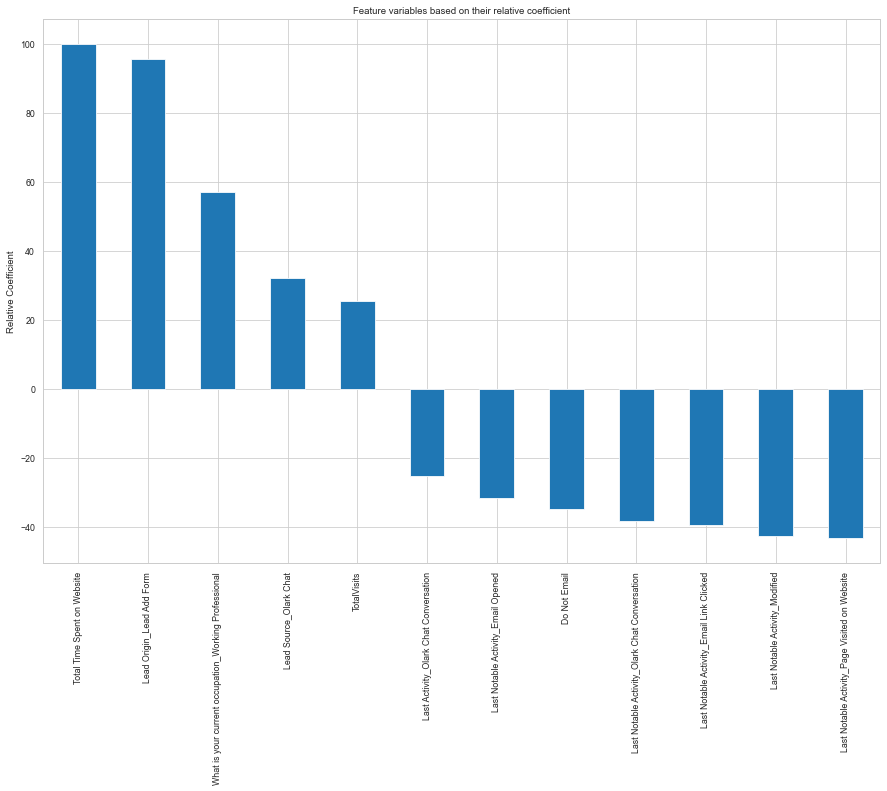

In [163]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (15,10))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [164]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
2,Total Time Spent on Website,100.00
3,Lead Origin_Lead Add Form,95.79
4,What is your current occupation_Working Profes...,57.02


In [165]:
# Selecting Least 3 features which contribute most towards the probability of a lead getting converted

pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).tail(3)

,index,0
7,Last Notable Activity_Email Link Clicked,-39.64
9,Last Notable Activity_Modified,-42.80
11,Last Notable Activity_Page Visited on Website,-43.38


# CONCLUSION & RECOMMENDATIONS


To improve the potential lead conversion rate X-Education will have to mainly focus important features responsible for good conversion rate are :-

Lead Source_Welingak Website : As conversion rate is higher for those leads who got to know about course from 'Welingak Website',so company can focus on this website to get more number of potential leads.

Lead Origin_Lead Add Form: Leads who have engaged through 'Lead Add Form' having higher conversion rate so company can focus on it to get more number of leads cause have a higher chances of getting converted.

What is your current occupation_Working Professional : The lead whose occupation is 'Working Professional' having higher lead conversion rate ,company should focus on working professionals nad try to get more number of leads.

Last Activity_SMS Sent: Lead whose last activity is sms sent can be potential lead for company.

Total Time Spent on website: Leads spending more time on website can be our potential lead.

Total visits -  leads visits most time is likely to convert more. 

# submitted by - pratiksha walke

# thank you